In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.color_palette("viridis")[1]

(0.212395, 0.359683, 0.55171)

## v04
* three datasets (schism small, schism large, roms)
* 2 days
* 1m time steps 
* \wo output


In [6]:
path = r'C:\Users\laurins\Documents\data\output\full_dataset_test_v00\full_dataset_test_v00.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]



rom
schism_large
schism_small


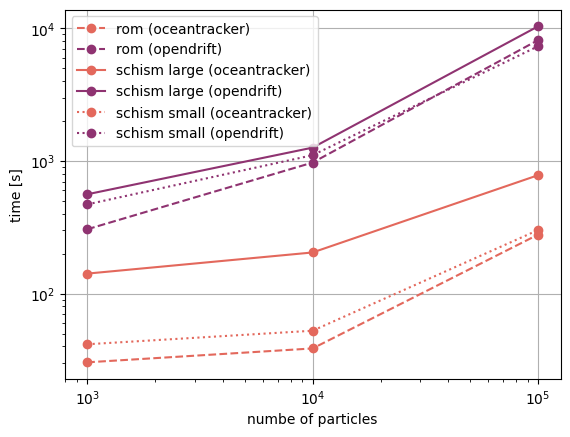

In [68]:
df = pd.read_csv(path, sep=',', header=None)
df.columns = ['model','data set','#particles','time']

colors = [sns.color_palette("flare")[1],sns.color_palette("flare")[4]]
for item in set(df['data set']):
    print(item)
    if item == 'schism_large':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'solid',
            marker = 'o',
            label='schism large (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'solid',
            marker = 'o',
            label='schism large (opendrift)')
    elif item == 'schism_small': 
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dotted',
            marker = 'o',
            label='schism small (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dotted',
            marker = 'o',
            label='schism small (opendrift)')
    elif item == 'rom':
        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'oceantracker')]['time'],
            color=colors[0],
            ls = 'dashed',
            marker = 'o',
            label='rom (oceantracker)')

        plt.plot(
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == item) * (df['model'] == 'opendrift')]['time'],
            color=colors[1],
            ls = 'dashed',
            marker = 'o',
            label='rom (opendrift)')

plt.legend()
plt.xlabel('numbe of particles')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

In [65]:
timing_data = {
    'schism_large': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_large') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'schism_small': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'schism_small') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )
    },
    'rom': {
        'oceantracker': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'oceantracker')]['time'],
            deg=1
        ),
        'opendrift': np.polynomial.polynomial.polyfit(
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['#particles'],
            df[(df['data set'] == 'rom') * (df['model'] == 'opendrift')]['time'],
            deg=1
        )    
    }
}
def print_dict_as_json(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            print_dict_as_json(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))
print_dict_as_json(timing_data)

print()
for item in timing_data:
    print(item, timing_data[item]['opendrift'][1]/timing_data[item]['oceantracker'][1])


schism_large
	oceantracker
		[1.37351397e+02 6.44412357e-03]
	opendrift
		[3.66491861e+02 9.98950432e-02]
schism_small
	oceantracker
		[3.25487798e+01 2.68320803e-03]
	opendrift
		[4.07295092e+02 6.92554177e-02]
rom
	oceantracker
		[2.06679451e+01 2.57205501e-03]
	opendrift
		[2.03147729e+02 7.95212750e-02]

schism_large 15.50172682258241
schism_small 25.810677695072638
rom 30.917408363307672


## v03
* od was not using the smaller step size - fixed that
* (classic confirmation bias situation btw)


In [7]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v03.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

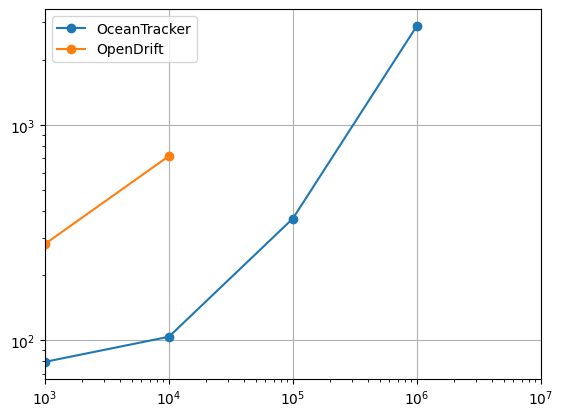

In [33]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e3,1e7)
plt.legend()

In [14]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

79.75468787690359 0.0028001145008932373
231.26229911111125 0.04851583088888887
speedup ot: 17.326373929856192


## v02 - buggy
* disables output writing in OT
* reused the OD points from v01


In [16]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v02.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

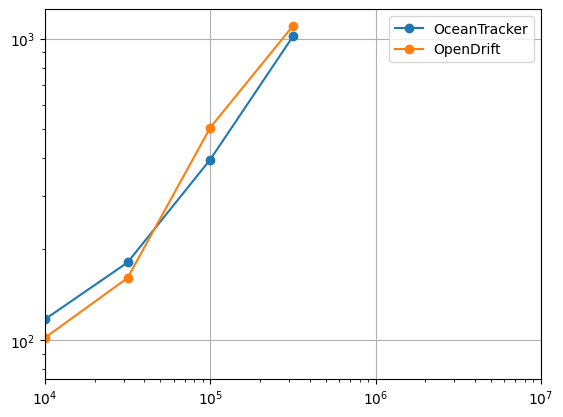

In [17]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [18]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

87.40747294234151 0.0029498262776123324
87.40835403468479 0.0032843996675228334
speedup ot: 1.1134213877100971


## v01 - buggy 
* more release points
* 1min time steps
* ~~no output writing~~ I misconfigured OT and it still wrote the tracks
* integration scheme changed to rk4


In [13]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v01.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

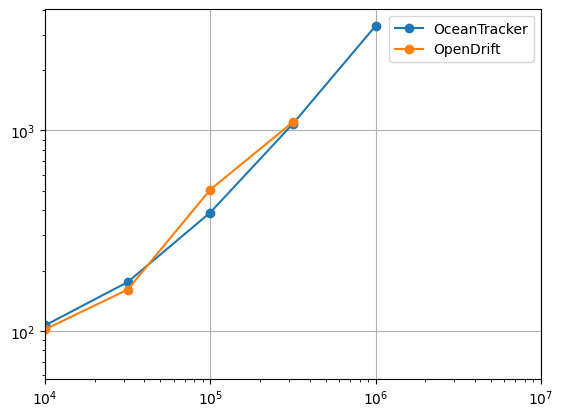

In [14]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [15]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

66.5367369193496 0.003251868681948735
87.40835403468479 0.0032843996675228334
speedup ot: 1.010003782057584


## v00 - initial 

In [11]:
path = 'C:\\Users\\laurins\\Documents\\data\\output\\schism_test_v00.txt'
with open(path) as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    data = [x.split(',') for x in data]


ot_data = [ [item[1],item[2]] for item in data if item[0] == 'oceantracker']
od_data = [ [item[1],item[2]] for item in data if item[0] == 'opendrift']

ot_data = np.array(ot_data).astype(float)
od_data = np.array(od_data).astype(float)

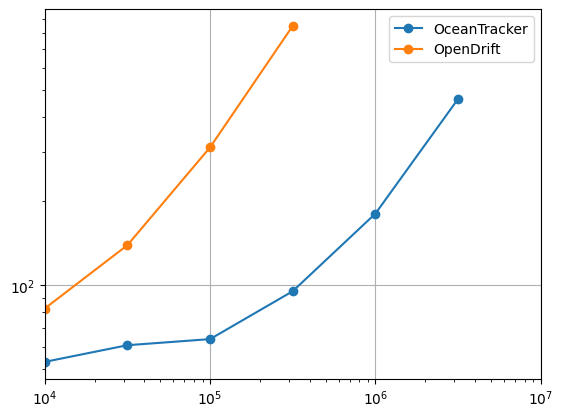

In [12]:
plt.plot(ot_data[:,0],ot_data[:,1],label='OceanTracker',marker='o')
plt.plot(od_data[:,0],od_data[:,1],label='OpenDrift',marker='o')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e4,1e7)
plt.legend()

In [32]:
load_buffer_ot,scaling_ot = np.polynomial.polynomial.polyfit(ot_data[:,0],ot_data[:,1],1)
load_buffer_od,scaling_od = np.polynomial.polynomial.polyfit(od_data[:,0],od_data[:,1],1)

print(load_buffer_ot,scaling_ot)
print(load_buffer_od,scaling_od)

print("speedup ot:",scaling_od/scaling_ot)

59.67797034330147 0.00012698916957450088
65.73324578927514 0.002469448901137713
speedup ot: 19.446137882561384
